# Exploratory Data Analysis (EDA) - zadania

Przanalizuj zbiór danych `weather.csv`, który zawiera pomiary parametrów pogodowych w pewnym miejscu na przestrzeni 10 lat. Wykonaj poniższe zadania.

Zadania 1-5  - 25 minut

Zadania 6-9  - 20 minut

Zadania 10-13 - 20 minut

Zadania 14-15 - 15 minut

Zadania 16-18 - 30 minut

Zadania 19-20 - 10 minut

1. Wczytaj dane pogodowe z pliku weather.csv. Zobacz pierwszych 5 wierszy.

In [135]:
import pandas as pd
from datetime import datetime
import matplotlib.dates
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("data/weather.csv")

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


2. Sprawdź czy są brakujące wartości i w jakich kolumnach

In [5]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

3. Wywołaj na zbiorze danych funkcję, która wypisze podstawowe statystyki opisujące kolumny numeryczne, np. średnią, medianę itp.

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


4. Zmień nazwy kolumn na takie, którymi wygodniej się będzie posługiwać (usuń spacje, jednostki itp)

In [80]:
df.rename(columns={
    "Temperature (C)" : "Temp", "Apparent Temperature (C)" : "AppTemp", "Precip Type" : "PrecipType",
    "Wind Speed (km/h)" : "WindSpeed", "Wind Bearing (degrees)" : "Wind Bearing",
    "Visibility (km)" : "Visib", "Pressure (millibars)" : "Press", "Formatted Date" : "ForDate"
                  }, inplace = True)

5. Przeformatuj albo utwórz nową kolumnę na bazie istniejącej kolumny z datą i godziną tak aby pozbyć się informacji o strefie czasowej (po plusie). 

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Wykorzystaj apply i lambda aby na bazie istniejącej kolumny dodać nową
</details>


In [33]:
df["Date"] = df["ForDate"].apply(lambda x: x[:-6])

In [34]:
df

,ForDate,Summary,Precip Type,Temp,App Temp,Humidity,Wind Speed,Wind Bearing,Visib,Loud Cover,Press,Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00.000
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00.000
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00.000
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00.000


6. Usuń kolumnę `Daily Summary`

In [35]:
df.drop(["Daily Summary"], axis=1, inplace=True)

7. Dodaj nowe kolumny: year, month, day, hour oraz minute

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Wykorzystaj apply i lambda aby stworzyć nowe kolumny na bazie istniejących. Wytnij odpowiednie slice'y ze stringów
</details>


In [38]:
df["year"] = df["ForDate"].apply(lambda x: x[0:4])
df["year"]

0        2006
1        2006
2        2006
3        2006
4        2006
         ... 
96448    2016
96449    2016
96450    2016
96451    2016
96452    2016
Name: year, Length: 96453, dtype: object

In [40]:
df["month"] = df["ForDate"].apply(lambda x: x[5:7])
df["month"]

0        04
1        04
2        04
3        04
4        04
         ..
96448    09
96449    09
96450    09
96451    09
96452    09
Name: month, Length: 96453, dtype: object

In [41]:
df["day"] = df["ForDate"].apply(lambda x: x[8:10])
df["day"]

0        01
1        01
2        01
3        01
4        01
         ..
96448    09
96449    09
96450    09
96451    09
96452    09
Name: day, Length: 96453, dtype: object

In [42]:
df["hour"] = df["ForDate"].apply(lambda x: x[11:13])
df["hour"]

0        00
1        01
2        02
3        03
4        04
         ..
96448    19
96449    20
96450    21
96451    22
96452    23
Name: hour, Length: 96453, dtype: object

In [43]:
df["minute"] = df["ForDate"].apply(lambda x: x[14:16])
df["minute"]

0        00
1        00
2        00
3        00
4        00
         ..
96448    00
96449    00
96450    00
96451    00
96452    00
Name: minute, Length: 96453, dtype: object

8. Oblicz średnie temperatury oraz - osobno - temperatury odczuwalne w poszczególnych miesiącach. Wyniki przedstaw w postaci nowo utworzonego data frame'a

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Utwórz puste listy dla średnich temperatur oraz średnich temperatur odczuwalnych
<br>
2. Przeiteruj po wszystkich miesiącach (posortowanych) i konstruuj sub data frame'y które zawierają informacje dla danych miesięcy
<br>
3. Policz średnie temperatury i dodaj do listy
<br>
4. Utwórz data frame
</details>


In [49]:
df.groupby("month")[["Temp", "AppTemp"]].mean().reset_index()

,month,Temp,AppTemp
0,01,0.813890,-1.939615
1,02,2.159699,-0.565343
2,03,6.906599,5.074268
3,04,12.756417,12.141164
4,05,16.873692,16.732751
5,06,20.715617,20.742264
6,07,22.963943,22.976086
7,08,22.345031,22.270497
8,09,17.516790,17.404283
9,10,11.342247,10.694346


9. Policz średnie ciśnienie dla obserwacji, w których temperatura wynosi między 15 a 20 stopni Celsjusza

In [51]:
df[(df["Temp"] < 20) & (df["Temp"] > 15)]["Press"].mean()

1005.7681488303555

10. Policz średnią temperaturę dla poszczególnych wartości w kolumnie `Summary`

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Wyznacz unikalne wartości w kolumnie Summary po czym przeiteruj po nich, utwórz w każdej iteracji sub data frame i policz średnią z odpowiedniej kolumny
</details>


In [52]:
df.groupby("Summary")[["Temp"]].mean().reset_index()

,Summary,Temp
0,Breezy,7.922016
1,Breezy and Dry,21.111111
2,Breezy and Foggy,-0.510317
3,Breezy and Mostly Cloudy,11.093411
4,Breezy and Overcast,7.241614
5,Breezy and Partly Cloudy,12.492761
6,Clear,11.925109
7,Dangerously Windy and Partly Cloudy,8.944444
8,Drizzle,10.847578
9,Dry,29.083660


11. Przedstaw na wykresie punktowym zależność temperatury od temperatury odczuwalnej

In [57]:
np.linspace(-30,40,100)

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [60]:
x = np.linspace(-30, 40, 2)
y = x

Text(0, 0.5, 'Temp')

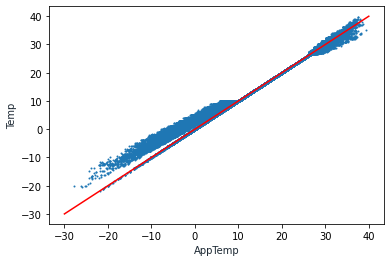

In [68]:
plt.scatter(df["AppTemp"], df["Temp"], s=1)
plt.plot(x, y, '-r')
plt.xlabel('AppTemp', color='#1C2833')
plt.ylabel('Temp', color='#1C2833')
#plt.figure().patch.set_facecolor('xkcd:white')

12. Stwórz histogramy prędkości wiatru, widoczności oraz ciśnienia

<AxesSubplot:>

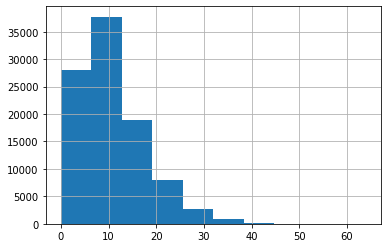

In [74]:
df["WindSpeed"].hist()

<AxesSubplot:>

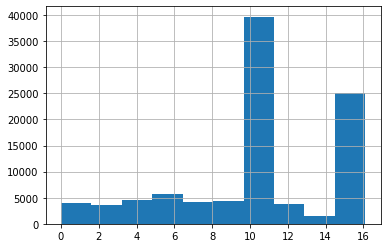

In [75]:
df["Visib"].hist()

<AxesSubplot:>

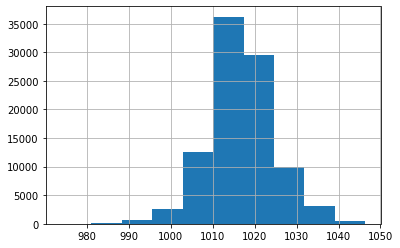

In [79]:
df[df["Press"] > 900]["Press"].hist()

13. Stwórz barplot, który pokaże częstość występowania poszczególnych kategorii w `Precip Type`

In [87]:
barplotdf = df.groupby("PrecipType").count()[["ForDate"]].reset_index()

In [101]:
x_list = barplotdf.iloc[:,0].tolist()
y_list = barplotdf.iloc[:,1].tolist()

<BarContainer object of 2 artists>

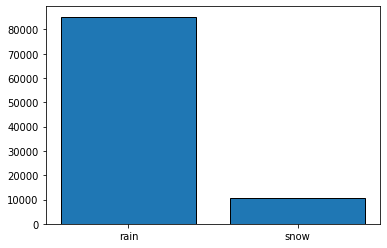

In [103]:
plt.bar(x=x_list, height=y_list, edgecolor='k')

14. Stwórz lineplot na którym przedstawisz zmiany temperatury w 2012 roku. Dla każdego dnia możesz uwzględnić jedną temperaturę

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Wyciągnij z głównego df-a dane z rokiem równym 2012
<br>
2. Posortuj kolejno po miesiącu i dniu
<br>
3. Wyciągnij odpowiednią kolumnę
<br>
4. Wyciągnij co 24-ty element
    <br>
5. Utwórz scatterplot
</details>


In [144]:
df["year-month-day"] = df["year"] + "-" + df["month"] + "-" + df["day"]

In [145]:
df["year-month-day"]

0        2006-04-01
1        2006-04-01
2        2006-04-01
3        2006-04-01
4        2006-04-01
            ...    
96448    2016-09-09
96449    2016-09-09
96450    2016-09-09
96451    2016-09-09
96452    2016-09-09
Name: year-month-day, Length: 96453, dtype: object

In [116]:
df[df['year'] == '2012']

,ForDate,Summary,PrecipType,Temp,AppTemp,Humidity,WindSpeed,Wind Bearing,Visib,Loud Cover,Press,Date,year,month,day,hour,minute,month-day
52608,2012-04-01 00:00:00.000 +0200,Breezy and Overcast,rain,9.444444,5.511111,0.52,35.4200,340.0,16.1000,0.0,1002.80,2012-04-01 00:00:00.000,2012,04,01,00,00,04-01
52609,2012-04-01 01:00:00.000 +0200,Mostly Cloudy,rain,8.333333,5.194444,0.45,20.9300,320.0,16.1000,0.0,1004.10,2012-04-01 01:00:00.000,2012,04,01,01,00,04-01
52610,2012-04-01 02:00:00.000 +0200,Breezy and Mostly Cloudy,rain,6.855556,2.244444,0.54,33.2304,322.0,15.1501,0.0,1004.97,2012-04-01 02:00:00.000,2012,04,01,02,00,04-01
52611,2012-04-01 03:00:00.000 +0200,Mostly Cloudy,rain,6.111111,1.888889,0.57,25.7600,310.0,16.1000,0.0,1005.90,2012-04-01 03:00:00.000,2012,04,01,03,00,04-01
52612,2012-04-01 04:00:00.000 +0200,Breezy and Overcast,rain,6.111111,1.605556,0.51,28.9800,310.0,16.1000,0.0,1006.00,2012-04-01 04:00:00.000,2012,04,01,04,00,04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61387,2012-09-09 19:00:00.000 +0200,Clear,rain,23.883333,23.883333,0.37,7.7924,41.0,9.9820,0.0,1018.41,2012-09-09 19:00:00.000,2012,09,09,19,00,09-09
61388,2012-09-09 20:00:00.000 +0200,Clear,rain,22.050000,22.050000,0.41,8.4686,58.0,10.3523,0.0,1018.72,2012-09-09 20:00:00.000,2012,09,09,20,00,09-09
61389,2012-09-09 21:00:00.000 +0200,Clear,rain,20.861111,20.861111,0.44,9.2253,70.0,9.9820,0.0,1019.12,2012-09-09 21:00:00.000,2012,09,09,21,00,09-09
61390,2012-09-09 22:00:00.000 +0200,Clear,rain,20.766667,20.766667,0.46,10.8675,70.0,15.8263,0.0,1019.23,2012-09-09 22:00:00.000,2012,09,09,22,00,09-09


,year-month-day,Temp
0,2012-01-01,0.129861
1,2012-01-02,3.455556
2,2012-01-03,5.201620
3,2012-01-04,3.839120
4,2012-01-05,4.210185
...,...,...
361,2012-12-27,4.884954
362,2012-12-28,3.997222
363,2012-12-29,-0.835880
364,2012-12-30,-0.544676


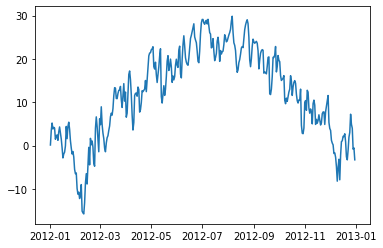

In [163]:
lineplotdf = df[df['year'] == '2012'].groupby("year-month-day")[["Temp"]].mean().reset_index()
lineplotdf
x_list = lineplotdf["year-month-day"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d")).tolist()
y_list = lineplotdf["Temp"]
dates = matplotlib.dates.date2num(x_list)
plt.plot_date(dates, y_list, "-")

15. Utwórz wykres, który będzie składał się z 12 mniejszych wykresów z czego każdy będzie zawierał scatterplot temperatury odczuwalnej od wilgotności w 2008 roku dla poszczególnych miesięcy

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Wyciągnij z głównego df-a dane z rokiem równym 2008
<br>
2. Utwórz wykres (subplots) o odpowiedniej liczbie podwykresów
<br>
3. Przeiteruj podwójną pętlą po tablicy numpy z osiami (
<br>
4. W każdej iteracji wyciągnij część danych z danego miesiąca. Możesz skorzystać ze zmiennej oznaczającej miesiąc, która w każdej iteracji będzie inkrementowana
    <br>
5. Utwórz scatterplot na odpowiednim subplocie
</details>


In [166]:
df15 = df[df['year'] == '2008']

In [197]:
x_list(i) = df15[df15['month'] == i]['Humidity'].tolist();

SyntaxError: cannot assign to function call (3143785308.py, line 1)

In [178]:
y_list = df15[df15['month'] == '01']['AppTemp'].tolist();

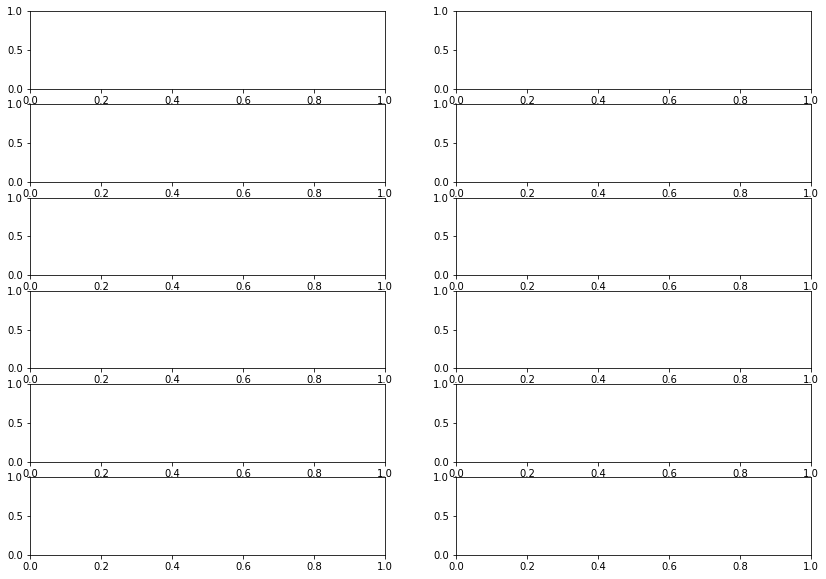

In [164]:
fig, axes = plt.subplots(figsize=(14, 10), nrows=6, ncols=2)

In [165]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

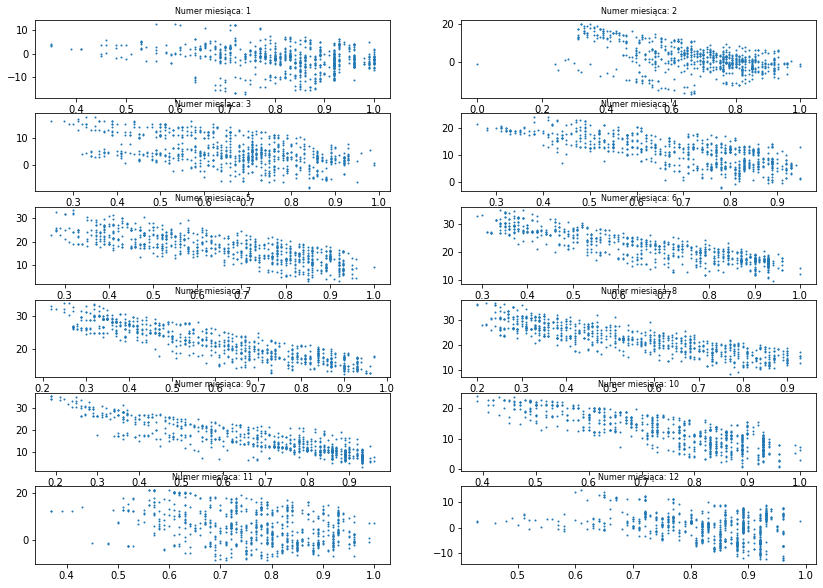

In [207]:
fig, axes = plt.subplots(figsize=(14, 10), nrows=6, ncols=2)

for idx, ax in enumerate(axes.reshape(-1)):
        x_list = df15[df15['month'].astype(int) - 1 == idx]['Humidity'].tolist()
        y_list = df15[df15['month'].astype(int) - 1 == idx]['AppTemp'].tolist()
        ax.scatter(x_list, y_list, s=1)
        ax.set_title(f"Numer miesiąca: {idx+1}", fontsize=8)

16. Przedstaw na wykresie słupkowym średnią temperaturę w kolejnych miesiącach

In [210]:
barplotdf = df.groupby("month").mean()[["Temp"]].reset_index()
barplotdf
x_list = barplotdf.iloc[:,0].tolist()
y_list = barplotdf.iloc[:,1].tolist()

<BarContainer object of 12 artists>

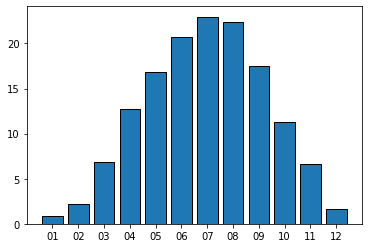

In [211]:
plt.bar(x=x_list, height=y_list, edgecolor='k')

17. Zrób to samo co w poprzednim wykresie, ale osobno dla każdego roku na przestrzeni 2007-2012. Użyj `subplots`

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Utwórz wykres (subplots) o odpowiedniej liczbie subplotów
<br>
2. Przeiteruj po zakresie lat, który jest podany w zadaniu
<br>
3. Wewnątrz przeiteruj po kolejnych miesiącach
<br>
4. Dla każdej kombinacji rok-miesiąc wyznacz sub data frame i średnią temperaturę z niego zapisz do wcześniej przygotowanej listy (append)
    <br>
5. Narysuj barplot średnie temperatur vs. kolejne miesiące na odpowiednim subplocie
</details>


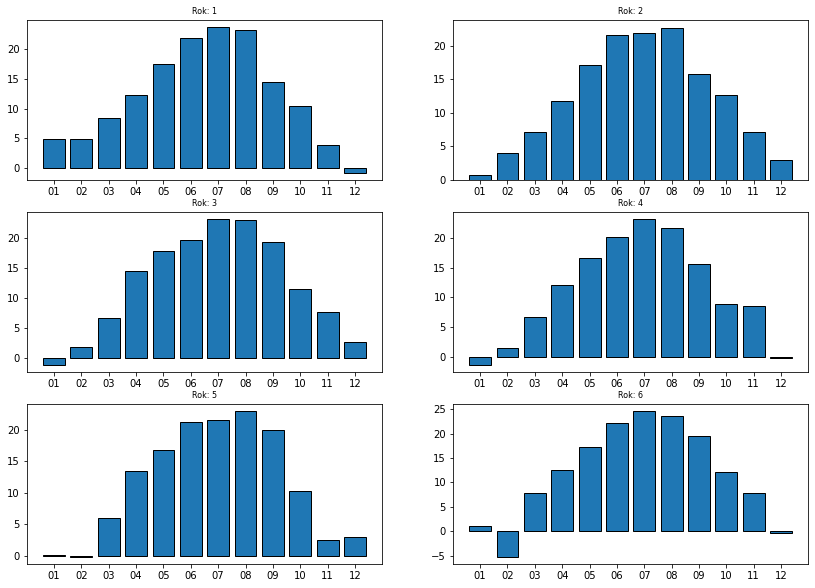

In [213]:
fig, axes = plt.subplots(figsize=(14, 10), nrows=3, ncols=2)

for idx, ax in enumerate(axes.reshape(-1)):
        barplotdf = df[df['year'].astype(int) == 2007 +idx].groupby("month").mean()[["Temp"]].reset_index()
        x_list = barplotdf.iloc[:,0].tolist()
        y_list = barplotdf.iloc[:,1].tolist()
        ax.bar(x=x_list, height=y_list, edgecolor='k')
        ax.set_title(f"Rok: {idx+1}", fontsize=8)

18. Na jednym wykresie stwórz scatterplot temperatury od temperatury odczuwalnej. Każdą porę roku zaznacz osobnym kolorem i dodaj legendę. Dla uproszczenia przyjmij, że pory roku pokrywają się całkowicie z miesiącami.

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Utwórz kolumnę która będzie przechowywać informację o porze roku. Wykorzystaj w tym celu apply i lambda. Przyda się też słownik, który dla każdego miesiąca przypisze porę roku
<br>
2. Przeiteruj po wszystkich porach roku. Wewnątrz pętli wyznacz sub data frame odpowiadający danej porze roku
<br>
3. Narysuj odpowiedni scatterplot. Ustaw odpowiedni rozmiar markerów, dodaj label i color. Wszystkie wykresy mają znajdować się obok siebie przez co mogą się nakładać
<br>
4. Dodaj legendę
</details>


In [235]:
seasondict = {i+1 : "zima" for i in range(3)} | {i+4 : "wiosna" for i in range(3)} | {i+7 : "lato" for i in range(3)} | {i+10 : "jesień" for i in range(3)}

In [237]:
df["season"] = df["month"].apply(lambda x: seasondict[int(x)])

In [238]:
df["season"]

0        wiosna
1        wiosna
2        wiosna
3        wiosna
4        wiosna
          ...  
96448      lato
96449      lato
96450      lato
96451      lato
96452      lato
Name: season, Length: 96453, dtype: object

In [239]:
x = np.linspace(-30, 40, 2)
y = x

Text(0, 0.5, 'Temp')

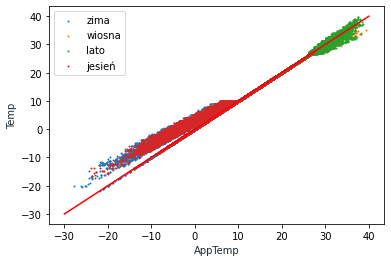

In [247]:
for elem in ["zima", "wiosna", "lato", "jesień"]:
    plt.scatter(df[df["season"] == elem]["AppTemp"],\
                df[df["season"] == elem]["Temp"], s=1, label=elem)

plt.plot(x, y, '-r')
plt.legend()
plt.xlabel('AppTemp', color='#1C2833')
plt.ylabel('Temp', color='#1C2833')
#plt.figure().patch.set_facecolor('xkcd:white')

19. Zaokrąglij w kolumnie z temperaturą oraz temperaturą odczuwalną wartości do 2 cyfr po przecinku

In [249]:
df["Temp"] = df["Temp"].apply(round, args=(2,))

20. Utwórz nową kolumnę, w której za pomocą wartości 0 i 1 oznaczysz czy temperatura jest powyżej $0^oC$ czy nie

In [35]:
df["C"] = df["Temp"].apply(lambda x, 1 if ())